In [2]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LogisticRegression
from sklearn import datasets

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

Using TensorFlow backend.


In [10]:
df = pd.read_csv("StudentsPerformance.csv",index_col=0)
f = range(0,60)
d = range(60,70)
c = range(70,80)
b = range(80,90)
a = range(90,101)
f2 = [str(x) for x in f]
d2 = [str(x) for x in d]
c2 = [str(x) for x in c]
b2 = [str(x) for x in b]
a2 = [str(x) for x in a]
# math score replace
df.replace(f, 'F', inplace=True)
df.replace(d, 'D', inplace=True)
df.replace(c, 'C', inplace=True)
df.replace(b, 'B', inplace=True)
df.replace(a, 'A', inplace=True)
df.replace(a, 'A', inplace=True)
#test prep 
df.replace('none', 0, inplace=True)
df.replace('completed', 1, inplace=True)
# education replace
df.replace('some high school', 0, inplace=True)
df.replace('high school', 1, inplace=True)
df.replace('some college', 2, inplace=True)
df.replace("associate's degree", 3, inplace=True)
df.replace("bachelor's degree", 4, inplace=True)
df.replace("master's degree", 5, inplace=True)
#df.replace("associate's degree", 3, inplace=True)
# lunch replace
df.replace('free/reduced', 0, inplace=True)
df.replace('standard', 1, inplace=True)
df

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
gender,,,,,,,
female,group B,4,1,0,C,C,C
female,group C,2,1,1,D,A,B
female,group B,5,1,0,A,A,A
male,group A,3,0,0,F,F,F
male,group C,2,1,0,C,C,C
female,group B,3,1,0,C,B,C
female,group B,2,1,1,B,A,A
male,group B,2,0,0,F,F,F
male,group D,1,0,1,D,D,D


In [4]:
sel_feature = ['lunch','parental level of education'] # Select features
X = df[sel_feature].values
Y = df['math score'].values
Y = Y.flatten()

print(X)

[[1 4]
 [1 2]
 [1 5]
 ...
 [0 1]
 [1 2]
 [0 2]]


In [5]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
ylabel = encoder.transform(['A','B','C','D','F'])
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [6]:
# build model 
def baseline_model():
	# create model
	model = Sequential()
	model.add(Dense(8, input_dim=2, activation='relu'))
	model.add(Dense(5, activation='softmax'))
	# Compile model
	model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [8]:
# train model 
model = baseline_model();
history = model.fit(X,dummy_y,epochs=57,verbose=1)
y_pred = model.predict_classes(X)
print(y_pred)

Epoch 1/57
1000/1000 [==============================] - 0s 263us/step - loss: 1.6087 - acc: 0.3230
Epoch 2/57
1000/1000 [==============================] - 0s 52us/step - loss: 1.5845 - acc: 0.3230
Epoch 3/57
1000/1000 [==============================] - 0s 49us/step - loss: 1.5657 - acc: 0.3230
Epoch 4/57
1000/1000 [==============================] - 0s 51us/step - loss: 1.5503 - acc: 0.3230
Epoch 5/57
1000/1000 [==============================] - 0s 49us/step - loss: 1.5385 - acc: 0.3230
Epoch 6/57
1000/1000 [==============================] - 0s 47us/step - loss: 1.5290 - acc: 0.3230
Epoch 7/57
1000/1000 [==============================] - 0s 50us/step - loss: 1.5215 - acc: 0.3410
Epoch 8/57
1000/1000 [==============================] - 0s 47us/step - loss: 1.5146 - acc: 0.3430
Epoch 9/57
1000/1000 [==============================] - 0s 48us/step - loss: 1.5093 - acc: 0.3430
Epoch 10/57
1000/1000 [==============================] - 0s 62us/step - loss: 1.5051 - acc: 0.3360
Epoch 11/57
1000/1

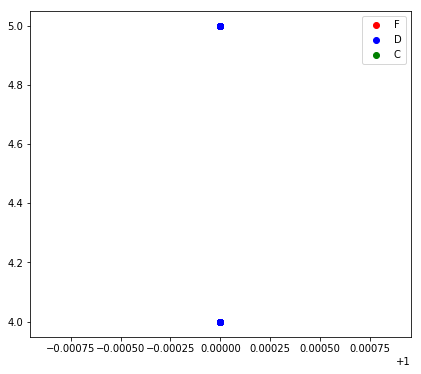

In [34]:
index = [np.nonzero(y_pred==ylabel[0])[0].ravel(),np.nonzero(y_pred==ylabel[1])[0].ravel(),np.nonzero(y_pred==ylabel[2])[0].ravel()]


plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.scatter(X[index[0],0],X[index[0],1],color='r',label='F')
plt.scatter(X[index[1],0],X[index[1],1],color='b',label ='D' )
plt.scatter(X[index[2],0],X[index[2],1],color='g',label = 'C')
plt.legend()

In [11]:
softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=5)
softmax_reg.fit(X,Y)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [23]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = softmax_reg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

print(Z)

[['F' 'F' 'F' ... 'D' 'D' 'D']
 ['F' 'F' 'F' ... 'D' 'D' 'D']
 ['F' 'F' 'F' ... 'D' 'D' 'D']
 ...
 ['F' 'F' 'F' ... 'B' 'B' 'B']
 ['F' 'F' 'F' ... 'B' 'B' 'B']
 ['F' 'F' 'F' ... 'B' 'B' 'B']]
